#**PROBLEMA DE NEGOCIO**


---




##Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor ROI?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

# **1. Configuración del Ambiente**


---




In [3]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dask.dataframe as dd
import mplcursors
from scipy.interpolate import make_interp_spline
global df_title_basics,df_title_ratings,df_tmdb

# **2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




## **2.1 Cargando las bases de datos y vista general del DataFrame**

### Base de datos general

In [4]:
df_title_basics = dd.read_csv('./title.basics.tsv', 
                              dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, 
                              delimiter='\t', 
                              low_memory=False)
df_title_basics.head(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"


In [108]:
#Revisión previa de número de columnas, filas y tipos de datos
df_title_basics_computado = df_title_basics.compute()
df_title_basics_computado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10843834 entries, 0 to 784377
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 827.3+ MB


### Base de datos raitings

In [5]:
df_title_ratings = dd.read_csv('./title.ratings.tsv', delimiter='\t', low_memory=False)
df_title_ratings.head(2)

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277


In [5]:
#Revisión previa de número de columnas, filas y tipos de datos
df_title_ratings_computado = df_title_ratings.compute()
df_title_ratings_computado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  object 
 1   averageRating  1446041 non-null  float64
 2   numVotes       1446041 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.1+ MB


### Base de datos presupuesto

In [6]:
df_tmdb = dd.read_csv('./TMDB_movie_dataset_v11.csv', low_memory=False)
df_tmdb.head(2)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.95,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.24,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."


In [7]:
#Revisión previa de número de columnas, filas y tipos de datos
df_tmdb_computado = df_tmdb.compute()
df_tmdb_computado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050797 entries, 0 to 160630
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1050797 non-null  int64  
 1   title                 1050785 non-null  object 
 2   vote_average          1050797 non-null  float64
 3   vote_count            1050797 non-null  int64  
 4   status                1050797 non-null  object 
 5   release_date          911227 non-null   object 
 6   revenue               1050797 non-null  int64  
 7   runtime               1050797 non-null  int64  
 8   adult                 1050797 non-null  bool   
 9   backdrop_path         289551 non-null   object 
 10  budget                1050797 non-null  int64  
 11  homepage              113397 non-null   object 
 12  imdb_id               583634 non-null   object 
 13  original_language     1050797 non-null  object 
 14  original_title        1050785 non-null  

## **2.2 Conservación de datos y toma de decisiones**

### **Primera conclusión**

Este analisis únicamente se desarrollará sobre dos tipos de titulos, los cuales serán SERIES Y PELICULAS, los cuales ya se encuentran categorizados dentro del DataFrame df_title_basics, por lo tanto, el primer filtro será retirar el resto de contenido.

Modificación en preprocesamiento

In [5]:
#Filtramos sobre la columna titleType, para verificar los tipos de contenido en los datos
df_title_basics.titleType.value_counts(normalize=False).compute()

titleType
tvMiniSeries      54849
tvMovie          148099
tvPilot               1
tvSpecial         47896
tvShort           10328
videoGame         38980
tvSeries         265035
movie            683312
short            999598
video            293289
tvEpisode       8302447
Name: count, dtype: int64

### **Segunda conclusión**

Las bases de datos df_tmdb y df_title_basics cuentan con información repetida como lo son primaryTitle y original title y toda vez que el primaryTitle se refiere al título principal de la película que generalmente se utiliza para identificar la película en la mayoría de las plataformas de datos y bases de datos cinematográficas, se decide optar por la conservación de esta columna en el DataFrame df_title_basics

In [8]:
#df_title_basics[df_title_basics.tconst == "tt10872600"].compute()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
645107,tt10872600,movie,Spider-Man: No Way Home,Spider-Man: No Way Home,0,2021,\N,148,"Action,Adventure,Fantasy"


In [9]:
#df_title_ratings[df_title_ratings.tconst == "tt10872600"].compute()

,tconst,averageRating,numVotes
510389,tt10872600,8.20,886954


In [10]:
#df_tmdb[df_tmdb.imdb_id == "tt10872600"].compute()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
57,634649,Spider-Man: No Way Home,7.99,18299,Released,2021-12-15,1921847111,148,False,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,200000000,https://www.spidermannowayhome.movie,tt10872600,en,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,186.06,/5weKu49pzJCt06OPpjvT80efnQj.jpg,The Multiverse unleashed.,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog","new york city, hero, showdown, magic, loss of ..."


### **Tercera conclusión**

Las bases de datos df_tmdb y df_title_basics cuentan con información repetida entre ellas como son las columnas isAdult(df_title_basics) - adult(df_tmdb), runtimeMinutes(df_title_basics) - runtime(df_tmdb) y genres(df_title_basics) - genres(df_tmdb) siendo que en la base de datos df_title_basics cuenta con 28 generos distintos y 483642  datos nulos, mientras que df_tmdb cuenta únicamente con 19 tipos de géneros distintos, sin datos nulos, **se decide conservar la información de la base df_tmdb**

A continuación el desglose de los géneros por base datos

In [11]:
"""# Paso 1: Normalizar los géneros a minúsculas y eliminar espacios en blanco
df_title_basics['genres'] = df_title_basics['genres'].str.lower().str.strip()

# Paso 2: Explode los géneros para tener un género por fila
df_exploded = df_title_basics.assign(genre=df_title_basics['genres'].str.split(',')).explode('genre')

# Paso 3: Eliminar espacios en blanco y caracteres especiales en cada género
df_exploded['genre'] = df_exploded['genre'].str.strip()

# Paso 4: Calcular la cantidad de contenidos por género después de la normalización
genre_counts = df_exploded['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Imprimir el resultado para ver la salida
print(genre_counts)"""

Dask DataFrame Structure:
                 genre  count
npartitions=14               
                object  int64
                   ...    ...
...                ...    ...
                   ...    ...
                   ...    ...
Dask Name: operation, 16 expressions
Expr=ColumnsSetter(frame=ResetIndex(frame=((Assign(frame=ExplodeFrame(frame=Assign(frame=Assign(frame=ReadCSV(81c0528))), column=['genre'])))['genre']).valuecounts(split_out=True)), columns=['genre', 'count'])


In [12]:
#genre_counts.compute()

,genre,count
0,animation,546257
1,musical,90926
2,mystery,221509
0,biography,116856
1,comedy,2138836
0,fantasy,226511
1,film-noir,874
2,horror,195222
3,music,406367
0,game-show,399415


In [13]:
"""genre_counts_pd = genre_counts.compute()
unique_genres = genre_counts_pd['genre'].unique()
num_unique_genres = len(unique_genres)"""

In [14]:
#print(f"Número de géneros distintos en df_title_basics es: {num_unique_genres}")

Número de géneros distintos en df_title_basics es: 29


In [15]:
"""# Paso 1: Normalizar los géneros a minúsculas y eliminar espacios en blanco
df_tmdb['genres'] = df_tmdb['genres'].str.lower().str.strip()

# Paso 2: Explode los géneros para tener un género por fila
df_exploded_df_tmdb = df_tmdb.assign(genre=df_tmdb['genres'].str.split(',')).explode('genre')

# Paso 3: Eliminar espacios en blanco y caracteres especiales en cada género
df_exploded_df_tmdb['genre'] = df_exploded_df_tmdb['genre'].str.strip()

# Paso 4: Calcular la cantidad de contenidos por género después de la normalización
genre_counts_df_tmdb = df_exploded_df_tmdb['genre'].value_counts().reset_index()
genre_counts_df_tmdb.columns = ['genre', 'count']

# Imprimir el resultado para ver la salida
print(genre_counts_df_tmdb)"""

Dask DataFrame Structure:
                genre  count
npartitions=7               
               object  int64
                  ...    ...
...               ...    ...
                  ...    ...
                  ...    ...
Dask Name: operation, 16 expressions
Expr=ColumnsSetter(frame=ResetIndex(frame=((Assign(frame=ExplodeFrame(frame=Assign(frame=Assign(frame=ReadCSV(40e73e9))), column=['genre'])))['genre']).valuecounts(split_out=True)), columns=['genre', 'count'])


In [16]:
#genre_counts_df_tmdb.compute()

,genre,count
0,adventure,22466
1,animation,54253
2,documentary,156438
3,mystery,18740
0,crime,32168
1,family,26967
2,thriller,44249
0,comedy,133526
1,science fiction,20111
0,action,42658


In [17]:
"""genre_counts_df_tmdb_pd = genre_counts_df_tmdb.compute()
unique_genres_df_tmdb = genre_counts_df_tmdb_pd['genre'].unique()
num_unique_genres_df_tmdb = len(unique_genres_df_tmdb)"""

In [18]:
#print(f"Número de géneros distintos en df_tmdb: {num_unique_genres_df_tmdb}")


Número de géneros distintos en df_tmdb: 19


### **Cuarta conclusión**

Toda vez que existe mucha información coincidente entre las columnas, se decide conservar de la base de datos df_tmdb y df_title_basics únicamente las columnas tconst, titleType y primaryTitle, que si bien al compartir el mismo identificador entre tablas se podría optimizar más el proceso de lectura de datos conservando únicamente las 2 primeras columnas, se conservará primaryTitle como referencia para un analisis más sencillo.

Modificacación en preprocesamiento

### **Quinta conclusión**

Las bases de datos df_title_ratings y df_tmdb, ambas cuentan con la misma información bajo diferente nombres de columnas, dado que la información en df_title_ratings cuenta con más votos y calificación diferente, se decide borrar esas columnas dentro de df_tmdb, ya que en caso contrario, se perdería el objetivo de haber cargado la base de datos df_title_ratings, siendo que es la única información que proporciona

Modificación en preprocesamiento

### **Sexta conclusión**

Con respecto a la base df_tmdb, es la que más columnas contiene, sin embargo, únicamente se seleccionarán aquellas columnas que no contengas información repetida con las otras bases de datos, dejando únicamente las columnas correspondientes a sus primary y foreing key y aquellas que aporten información valiosa para la obtención de insights como **release_date, revenue, runtime, adult, budget, imdb_id, original_language, genres, production_companies, production_countries y spoken_languages.**

Modificación en preprocesamiento

### **Septima conclusión**

Dentro de df_tmdb verificaremos el tipo de dato de las columnas revenue y budget, ya que las utilizaremos para calcular el RETURN OF INVESTMENT(ROI), por lo tanto, para que el calculo de la columna nueva no contenga errores, filtraremos únicamente aquellas filas que contengan valores mayores a cero

### **Octava conclusión**

Existen algunas columnas en los dataframes que cuentan con datos nulos, sin embargo, estos están en formato string con la representación "\N", por lo tanto, se remplezarán por valores nulos para su respectiva limpieza, esta modificación se realiza después del filtrado de columnas que aportan valor, para evitar la eliminación del menor número de registros.

Modificación en preprocesamiento

### **Novena conclusión**

Para evitar un análisis con sesgo, nos aseguramos que nuestras columas con nuestras llaves primarias y foraneas no cuenten con registros duplicados.

Modificación en preprocesamiento

### **Decima conclusión**

Por último establecemos el tipo de dato correspondiente a cada columna que se ha conservado, para un mejor análisis.

En df_title_basics y df_title_ratings no se requieren cambios

En df_tmdb modificaremos release_date a tipo date

## **2.2 Tratamiento de Datos**

Persistencia: Si estás realizando varias operaciones sobre los mismos datos, puede ser útil persistir el DataFrame en memoria para evitar recomputaciones innecesarias, es decir, después del preprocesamiento, usarlo, sería lo más eficiente para reducir los tiempos de ejecución sobre el analisis de los datos

In [47]:
#Ejemplo de uso de persist()
#df_tmdb = df_tmdb.persist()
#df_title_basics = df_title_basics.persist()
#df_title_ratings  = df_title_ratings.persist()

### **Busqueda de nulos**

In [12]:
# Encontrar valores nulos en cada columna
null_basics = df_title_basics.isna().compute()

# Mostrar la cantidad de valores nulos
cantidad_nulos_basics = null_basics.sum()

print(f"Cantidad de valores nulos por columna:\n{cantidad_nulos_basics}")

Cantidad de valores nulos por columna:
tconst           0
titleType        0
originalTitle    0
dtype: int64


In [16]:
# Encontrar valores nulos en cada columna
null_ratings = df_title_ratings.isna().compute()

# Mostrar la cantidad de valores nulos
cantidad_nulos_ratings = null_ratings.sum()

print(f"Cantidad de valores nulos por columna:\n{cantidad_nulos_ratings}")

Cantidad de valores nulos por columna:
tconst           0
averageRating    0
numVotes         0
dtype: int64


In [13]:
# Encontrar valores nulos en cada columna
null_tmdb = df_tmdb.isna().compute()

# Mostrar la cantidad de valores nulos
cantidad_nulos_tmdb = null_tmdb.sum()

print(f"Cantidad de valores nulos por columna:\n{cantidad_nulos_tmdb}")

Cantidad de valores nulos por columna:
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
imdb_id                 0
original_language       0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
ROI                     0
dtype: int64


In [15]:
# Convertir la columna 'budget' a numérica si es necesario
df_tmdb['budget'] = df_tmdb['budget'].astype(float)

# Encontrar valores menores o iguales cero en la columna 'budget'
valores_cero = (df_tmdb['budget']  <= 0).compute()

# Mostrar la cantidad de valores cero
cantidad_cero = valores_cero.sum()

print(f"Cantidad de valores menores o iguales a cero en la columna 'budget': {cantidad_cero}")


Cantidad de valores menores o iguales a cero en la columna 'budget': 0


In [14]:
# Convertir la columna 'budget' a numérica
df_tmdb['revenue'] = df_tmdb['revenue'].astype(float)

# Encontrar valores menores o iguales a cero en la columna 'revenue'
valores_cero = (df_tmdb['revenue']  <= 0).compute()

# Mostrar la cantidad de valores cero
cantidad_cero = valores_cero.sum()

print(f"Cantidad de valores menores o iguales a cero en la columna 'revenue': {cantidad_cero}")

Cantidad de valores menores o iguales a cero en la columna 'revenue': 0


In [10]:
print(df_title_basics.columns)

Index(['tconst', 'titleType', 'originalTitle', 'release_date'], dtype='object')


### **Preprocesamiento**

In [7]:
def preprocesamiento():
    global df_title_basics, df_title_ratings, df_tmdb

    # Elimina los registros de df_title_basics diferentes de 'tvSeries', 'movie'
    df_title_basics = df_title_basics.query("titleType == 'tvSeries' | titleType == 'movie'")
    df_title_basics = df_title_basics[['tconst', 'titleType', 'originalTitle', "startYear", "isAdult", "genres"]]
    df_title_basics = df_title_basics.rename(columns={'startYear': 'release_date'})   
    df_title_basics = df_title_basics.persist()  # Persistir después de filtrar y seleccionar columnas
 
    
    df_tmdb = df_tmdb[['title', 'revenue', 'runtime', 'budget', 'imdb_id', 'original_language', 'genres', 'production_companies', 'production_countries', 'spoken_languages']]
    df_tmdb = df_tmdb.query('revenue > 0 & budget > 0')
    df_tmdb = df_tmdb.persist()  # Persistir después de filtrar y seleccionar columnas

    # Crear la nueva columna 'roi'
    df_tmdb['ROI'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']
    df_tmdb_computed = df_tmdb[['ROI']].compute()

    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
    Q1 = df_tmdb_computed['ROI'].quantile(0.25)
    Q3 = df_tmdb_computed['ROI'].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites de los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los datos para eliminar outliers
    df_tmdb = df_tmdb[(df_tmdb['ROI'] >= lower_bound) & (df_tmdb['ROI'] <= upper_bound)]
    df_tmdb = df_tmdb.persist()  # Persistir después de calcular y filtrar outliers

    # Remplazar valores \N por nulos
    df_title_basics = df_title_basics.replace(r"\N", pd.NA)
    df_tmdb = df_tmdb.replace(r'\N', pd.NA)
    df_title_ratings = df_title_ratings.replace(r'\N', pd.NA)
    df_title_basics = df_title_basics.persist()  # Persistir después de reemplazar valores
    df_tmdb = df_tmdb.persist()
    df_title_ratings = df_title_ratings.persist()

    # Borrar duplicados
    df_title_basics = df_title_basics.drop_duplicates(subset=['tconst'])
    df_tmdb = df_tmdb.drop_duplicates(subset=['imdb_id'])
    df_title_ratings = df_title_ratings.drop_duplicates(subset=['tconst'])
    df_title_basics = df_title_basics.persist()  # Persistir después de eliminar duplicados
    df_tmdb = df_tmdb.persist()
    df_title_ratings = df_title_ratings.persist()

    # Borrar valores nulos
    df_title_basics = df_title_basics.dropna()
    df_tmdb = df_tmdb.dropna()
    df_title_ratings = df_title_ratings.dropna()
    df_title_basics = df_title_basics.persist()  # Persistir después de eliminar valores nulos
    df_tmdb = df_tmdb.persist()
    df_title_ratings = df_title_ratings.persist()
    
    #Cambiando tipos de datos
    df_title_basics['release_date'] = df_title_basics['release_date'].astype(int)
    df_title_basics = df_title_basics.persist()


# Llamar a la función para procesar los datos
preprocesamiento()


In [8]:
  #Computando los datos para visualizarlos como dataframe de pandas
df_title_basics_computado = df_title_basics.compute()
df_title_ratings_computado = df_title_ratings.compute()
df_tmdb_computado = df_tmdb.compute()

In [9]:
print(df_title_basics_computado.info())
print('-------------')
print(df_title_ratings_computado.info())
print('-------------')
print(df_tmdb_computado.info())

<class 'pandas.core.frame.DataFrame'>
Index: 739193 entries, 668 to 784099
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tconst         739193 non-null  object
 1   titleType      739193 non-null  object
 2   originalTitle  739193 non-null  object
 3   release_date   739193 non-null  int32 
 4   isAdult        739193 non-null  object
 5   genres         739193 non-null  object
dtypes: int32(1), object(5)
memory usage: 36.7+ MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
Index: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  object 
 1   averageRating  1446041 non-null  float64
 2   numVotes       1446041 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 44.1+ MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
Index: 8760 en

## **2.4 Análisis Exploratorio (EDA)**

In [10]:
df_title_basics_computado.describe()

,release_date
count,739193.00
mean,1999.19
std,25.90
min,1894.00
25%,1988.00
50%,2010.00
75%,2017.00
max,2031.00


In [11]:
#df_title_ratings_computado = df_title_ratings.compute()
df_title_ratings_computado.describe()

,averageRating,numVotes
count,1446041.00,1446041.00
mean,6.96,1032.07
std,1.38,17697.86
min,1.00,5.00
25%,6.20,11.00
50%,7.20,26.00
75%,7.90,101.00
max,10.00,2904305.00


In [12]:
df_tmdb_computado.describe()

,revenue,runtime,budget,ROI
count,8760.00,8760.00,8760.00,8760.00
mean,60610269.67,106.31,25771184.74,1.05
std,141006698.06,30.08,39318183.36,1.87
min,1.00,0.00,1.00,-1.00
25%,1800000.00,93.00,3000000.00,-0.43
50%,12286142.00,104.00,11500000.00,0.50
75%,52406133.25,120.00,30000000.00,2.00
max,2800000000.00,990.00,460000000.00,7.21


In [18]:
#Se elimina este outlayer identificado en gráfico, toda vez que corresponde a un videojuego llamado Omori
df_tmdb_computado = df_tmdb_computado[df_tmdb_computado['runtime'] != 990]

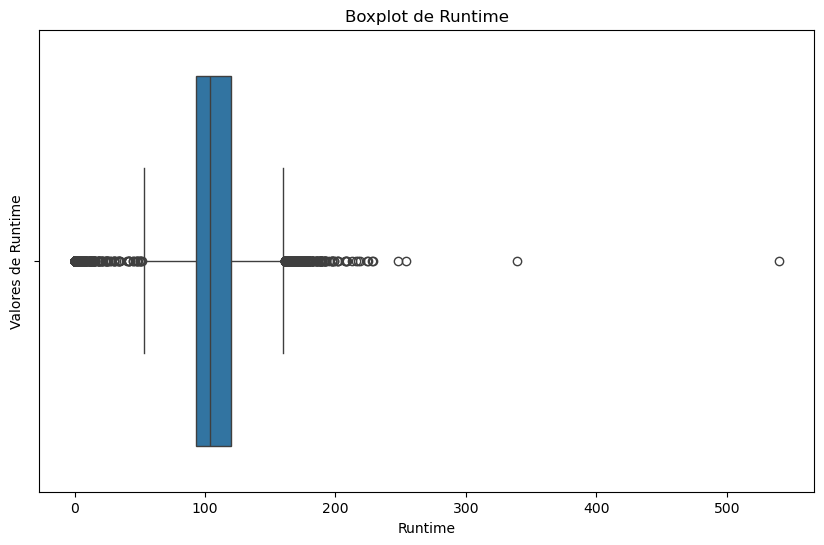

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tmdb_computado, x='runtime')

# Agregar título y etiquetas a la gráfica
plt.title('Boxplot de Runtime')
plt.xlabel('Runtime')
plt.ylabel('Valores de Runtime')


# Mostrar la gráfica
plt.show()

In [23]:
df_tmdb_computado_sorted = df_tmdb_computado.sort_values(by='runtime', ascending=False)
df_tmdb_computado_sorted.head()

,title,revenue,runtime,budget,imdb_id,original_language,genres,production_companies,production_countries,spoken_languages,ROI
62092,The Bear,20000000,540,20000000,tt14452776,en,"Comedy, Drama",FX Productions,United States of America,English,0.00
13004,Carlos,871279,339,18000000,tt1321865,en,"Crime, Drama, Thriller, History","Films en Stock, Egoli Tossell Film, Canal+, AR...","Germany, France","French, German, English, Spanish, Arabic, Hung...",-0.95
9761,Gettysburg,12700000,254,25000000,tt0107007,en,"Drama, History, War","TriStar Television, Esparza / Katz Productions...",United States of America,English,-0.49
5309,Cleopatra,71000000,248,44000000,tt0056937,en,"Drama, History, Romance","MCL Films S.A., Walwa Films S.A., 20th Century...","United States of America, United Kingdom, Swit...",English,0.61
864,Once Upon a Time in America,5500000,229,30000000,tt0087843,en,"Drama, Crime","The Ladd Company, Embassy International Pictur...","United States of America, Italy","English, French, Hebrew, Italian, Yiddish",-0.82


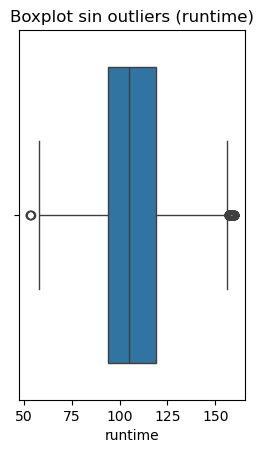

In [24]:
# Eliminar outliers usando el método del rango intercuartílico (IQR)
Q1 = df_tmdb_computado_sorted['runtime'].quantile(0.25)
Q3 = df_tmdb_computado_sorted['runtime'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_sin_outliers = df_tmdb_computado_sorted[(df_tmdb_computado_sorted['runtime'] >= lower_bound) & (df_tmdb_computado_sorted['runtime'] <= upper_bound)]

# Gráfico sin outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sin_outliers['runtime'])
plt.title('Boxplot sin outliers (runtime)')

plt.show()

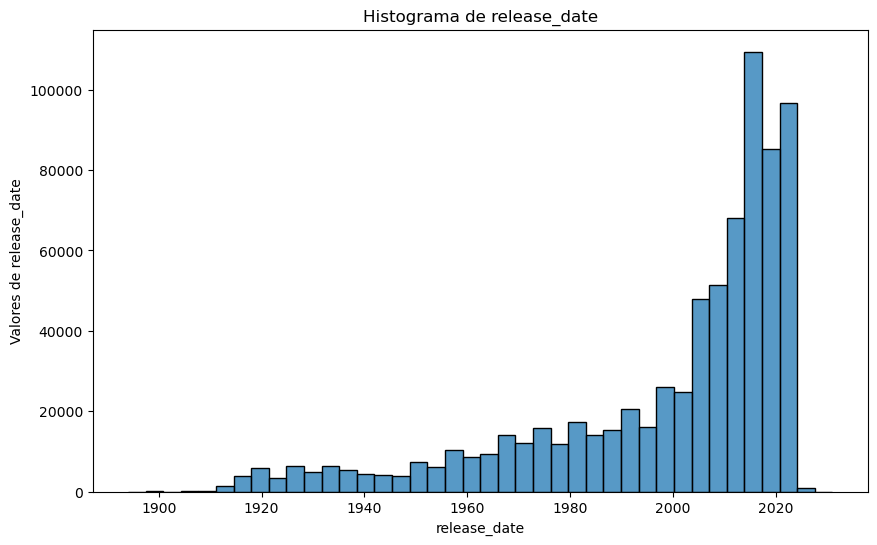

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_title_basics_computado, x='release_date', bins=40)

# Agregar título y etiquetas a la gráfica
plt.title('Histograma de release_date')
plt.xlabel('release_date')
plt.ylabel('Valores de release_date')


# Mostrar la gráfica
plt.show()

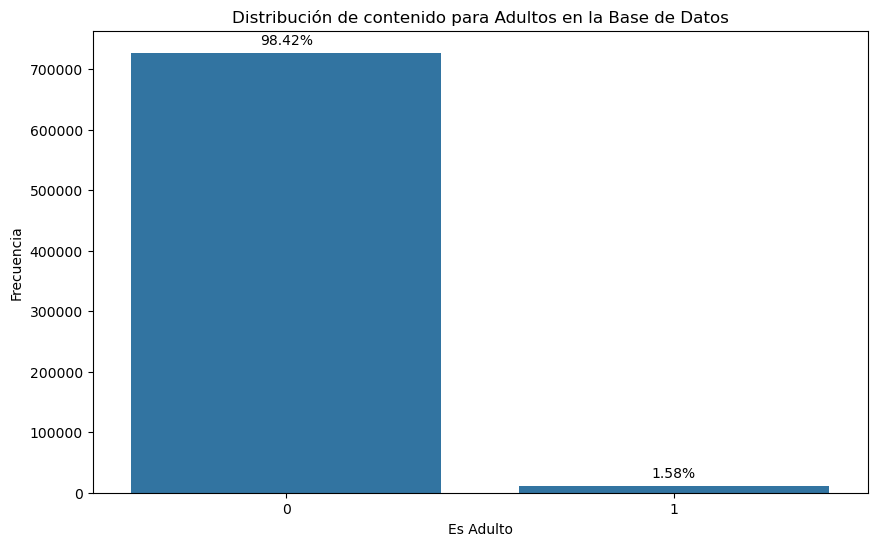

In [29]:
# Calcular los porcentajes
counts = df_title_basics_computado['isAdult'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_title_basics_computado, x='isAdult')

# Obtener los labels únicos para 'isAdult' presentes en el gráfico
unique_labels = df_title_basics_computado['isAdult'].unique()

# Crear un diccionario para buscar porcentajes rápidamente
percentage_dict = counts.to_dict()

# Agregar porcentajes a las barras
for p in ax.patches:
    height = p.get_height()
    # Obtener el label correspondiente a esta barra
    label = unique_labels[int(p.get_x() + p.get_width() / 2)]
    # Obtener el porcentaje desde el diccionario
    percentage = percentage_dict.get(label, 0)
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 9), textcoords='offset points')

# Agregar título y etiquetas a la gráfica
plt.title('Distribución de contenido para Adultos en la Base de Datos')
plt.xlabel('Es Adulto')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()


In [30]:
df_tmdb_computado["revenue"].describe()

count         8759.00
mean      60617189.43
std      141013260.54
min              1.00
25%        1800000.00
50%       12294931.00
75%       52412266.50
max     2800000000.00
Name: revenue, dtype: float64

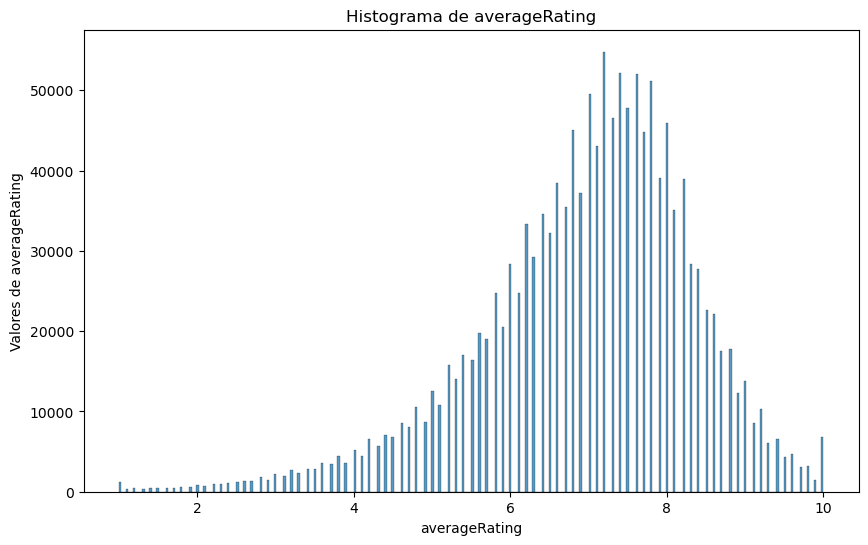

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_title_ratings_computado, x='averageRating')

# Agregar título y etiquetas a la gráfica
plt.title('Histograma de averageRating')
plt.xlabel('averageRating')
plt.ylabel('Valores de averageRating')


# Mostrar la gráfica
plt.show()

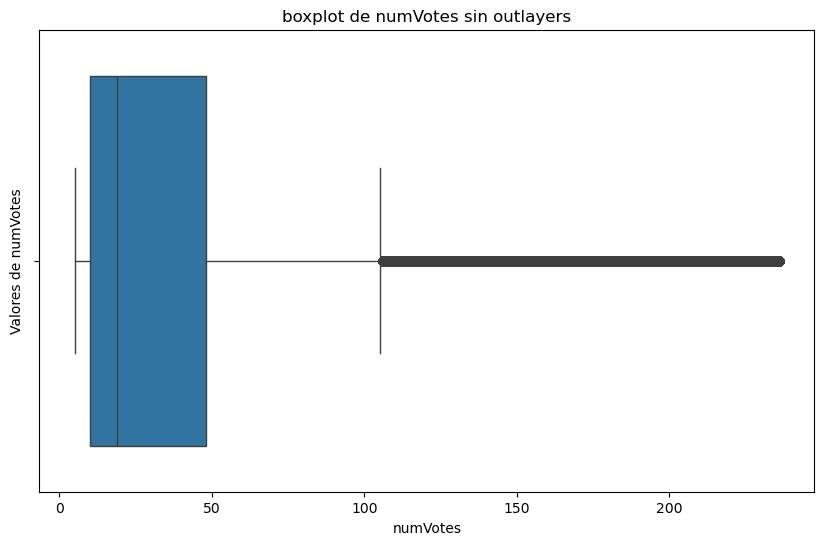

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sin_outliers, x='numVotes')

Q1 = df_title_ratings_computado['numVotes'].quantile(0.25)
Q3 = df_title_ratings_computado['numVotes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_sin_outliers = df_title_ratings_computado[(df_title_ratings_computado['numVotes'] >= lower_bound) & (df_title_ratings_computado['numVotes'] <= upper_bound)]

# Agregar título y etiquetas a la gráfica
plt.title('boxplot de numVotes sin outlayers')
plt.xlabel('numVotes')
plt.ylabel('Valores de numVotes')


# Mostrar la gráfica
plt.show()

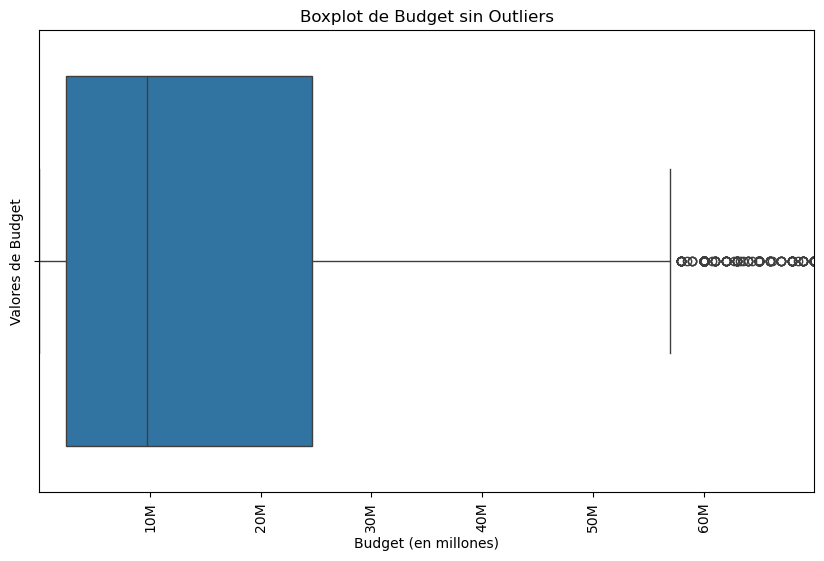

In [34]:
# Calcula los límites para el filtro de outliers usando IQR
Q1 = df_tmdb_computado['budget'].quantile(0.25)
Q3 = df_tmdb_computado['budget'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los datos para eliminar outliers
df_tmdb_sin_outliers = df_tmdb_computado[(df_tmdb_computado['budget'] >= lower_bound) & (df_tmdb_computado['budget'] <= upper_bound)]

# Configurar el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tmdb_sin_outliers, x='budget')

# Agregar título y etiquetas a la gráfica
plt.title('Boxplot de Budget sin Outliers')
plt.xlabel('Budget (en millones)')
plt.ylabel('Valores de Budget')

# Calcular el máximo y mínimo presupuesto para definir los ticks
max_budget = df_tmdb_sin_outliers['budget'].max()
min_budget = df_tmdb_sin_outliers['budget'].min()

# Configurar los ticks del eje X para que se ajusten al rango de valores de budget
# Se eligen intervalos de 1,000,000 (1M)
ticks = list(range(0, int(max_budget), 10000000))
labels = [f'{x/10_000_000:.0f}0M' for x in ticks]

plt.xticks(
    ticks=ticks,  # Define los intervalos de los ticks
    labels=labels,  # Define las etiquetas
    rotation=90  # Rotar las etiquetas para mejorar la legibilidad
)

# Ajustar el límite del eje X para evitar exceso de espacio
plt.xlim(min_budget, max_budget)

# Mostrar la gráfica
plt.show()



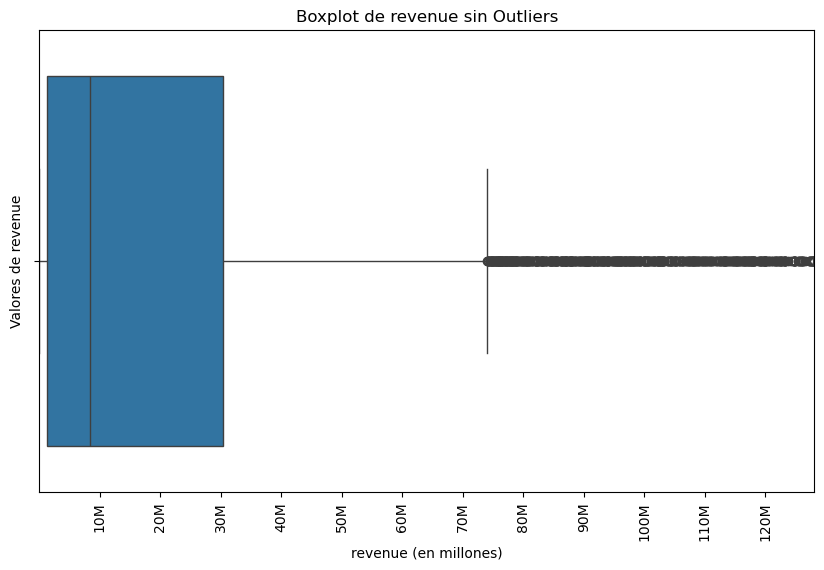

In [35]:
# Calcula los límites para el filtro de outliers usando IQR
Q1 = df_tmdb_computado['revenue'].quantile(0.25)
Q3 = df_tmdb_computado['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los datos para eliminar outliers
df_sin_outliers = df_tmdb_computado[(df_tmdb_computado['revenue'] >= lower_bound) & (df_tmdb_computado['revenue'] <= upper_bound)]

# Configurar el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sin_outliers, x='revenue')

# Agregar título y etiquetas a la gráfica
plt.title('Boxplot de revenue sin Outliers')
plt.xlabel('revenue (en millones)')
plt.ylabel('Valores de revenue')

# Calcular el máximo y mínimo presupuesto para definir los ticks
max_revenue = df_sin_outliers['revenue'].max()
min_revenue = df_sin_outliers['revenue'].min()

# Configurar los ticks del eje X para que se ajusten al rango de valores de budget
# Se eligen intervalos de 10,000,000 (10M)
ticks = list(range(0, int(max_revenue), 10000000))
labels = [f'{x/10_000_000:.0f}0M' for x in ticks]

plt.xticks(
    ticks=ticks,  # Define los intervalos de los ticks
    labels=labels,  # Define las etiquetas
    rotation=90  # Rotar las etiquetas para mejorar la legibilidad
)

# Ajustar el límite del eje X para evitar exceso de espacio
plt.xlim(min_revenue, max_revenue)

# Mostrar la gráfica
plt.show()

# **3. Preguntas y respuestas**


---




## **Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?**

In [22]:
# Combinar los dataframes 'df_title_basics' y 'df_title_ratings' por 'tconst'
df_merged = df_title_basics_computado.merge(df_title_ratings_computado, on='tconst')

In [34]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394036 entries, 0 to 394035
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         394036 non-null  object 
 1   titleType      394036 non-null  object 
 2   originalTitle  394036 non-null  object 
 3   release_date   394036 non-null  int32  
 4   isAdult        394036 non-null  object 
 5   genres         394036 non-null  object 
 6   averageRating  394036 non-null  float64
 7   numVotes       394036 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 22.5+ MB


In [36]:
df_merged.head()

,tconst,titleType,originalTitle,release_date,isAdult,genres,averageRating,numVotes
0,tt0000675,movie,Don Quijote,1908,0,Drama,4.20,20
1,tt0001338,movie,"Maiskaya noch, ili utoplennitsa",1910,0,Drama,5.20,18
2,tt0001475,movie,Amor fatal,1911,0,"Drama,Romance",7.40,23
3,tt0001964,movie,Die Verräterin,1911,0,Drama,5.90,102
4,tt0002670,movie,The Battle of Shiloh,1913,0,"Drama,War",4.20,16


In [23]:
# Agrupar por 'titleType' y contar el número de registros
df_grouped_type = df_merged.groupby('titleType').size().to_frame(name='count').reset_index()

# Calcular el porcentaje para cada categoría
df_grouped_type['Porcentaje'] = df_grouped_type['count'] / df_grouped_type['count'].sum() * 100

In [38]:
df_grouped_type

,titleType,count,Porcentaje
0,movie,301343,76.48
1,tvSeries,92693,23.52


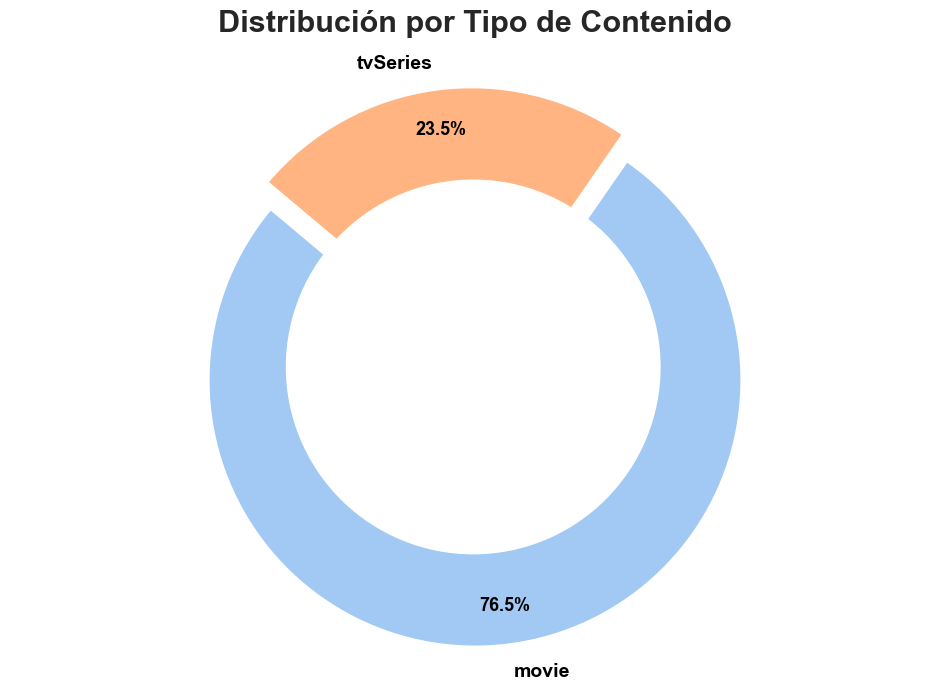

In [24]:
# Obtener una paleta de colores de Seaborn
colors = sns.color_palette("pastel", len(df_grouped_type))

# Crear el gráfico de pizza mejorado
fig, ax1 = plt.subplots(figsize=(12, 8))

# Explosión para todas las porciones
explode = [0.05] * len(df_grouped_type)

# Gráfico de pizza
wedges, texts, autotexts = ax1.pie(
    df_grouped_type['Porcentaje'], 
    labels=df_grouped_type['titleType'], 
    autopct="%1.1f%%", 
    explode=explode, 
    colors=colors,
    startangle=140,  # Inicio en ángulo para mejor visualización
    wedgeprops={'edgecolor': 'w', 'linewidth': 2},  # Contorno blanco
    textprops={'fontsize': 14, 'weight': 'bold'},  # Propiedades del texto
    pctdistance=0.85,  # Distancia del porcentaje al centro
)

# Ajustar el título
ax1.set_title("Distribución por Tipo de Contenido", fontsize=22, weight='bold', pad=20)

# Ajustar colores y estilos de texto
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')
    autotext.set_fontsize(13)

# Añadir un círculo en el centro para hacer una dona
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Asegurar que el gráfico es un círculo
ax1.axis('equal')

# Mostrar el gráfico mejorado
plt.show()


In [45]:
# Agrupar por 'titleType' y año, y calcular el rating promedio
df_grouped_rating = df_merged.groupby(['titleType', 'release_date'])['averageRating'].mean().reset_index()

# Filtrar por tipo de contenido específico (películas y series de televisión)
df_movies = df_grouped_rating[(df_grouped_rating['titleType'] == 'movie') & (df_grouped_rating['release_date'] >= 1990)]
df_tvseries = df_grouped_rating[(df_grouped_rating['titleType'] == 'tvSeries') & (df_grouped_rating['release_date'] >= 1990)]

In [52]:
df_grouped_rating.head()

,titleType,release_date,averageRating
0,movie,1894,5.40
1,movie,1896,4.00
2,movie,1897,4.80
3,movie,1898,3.60
4,movie,1899,3.60


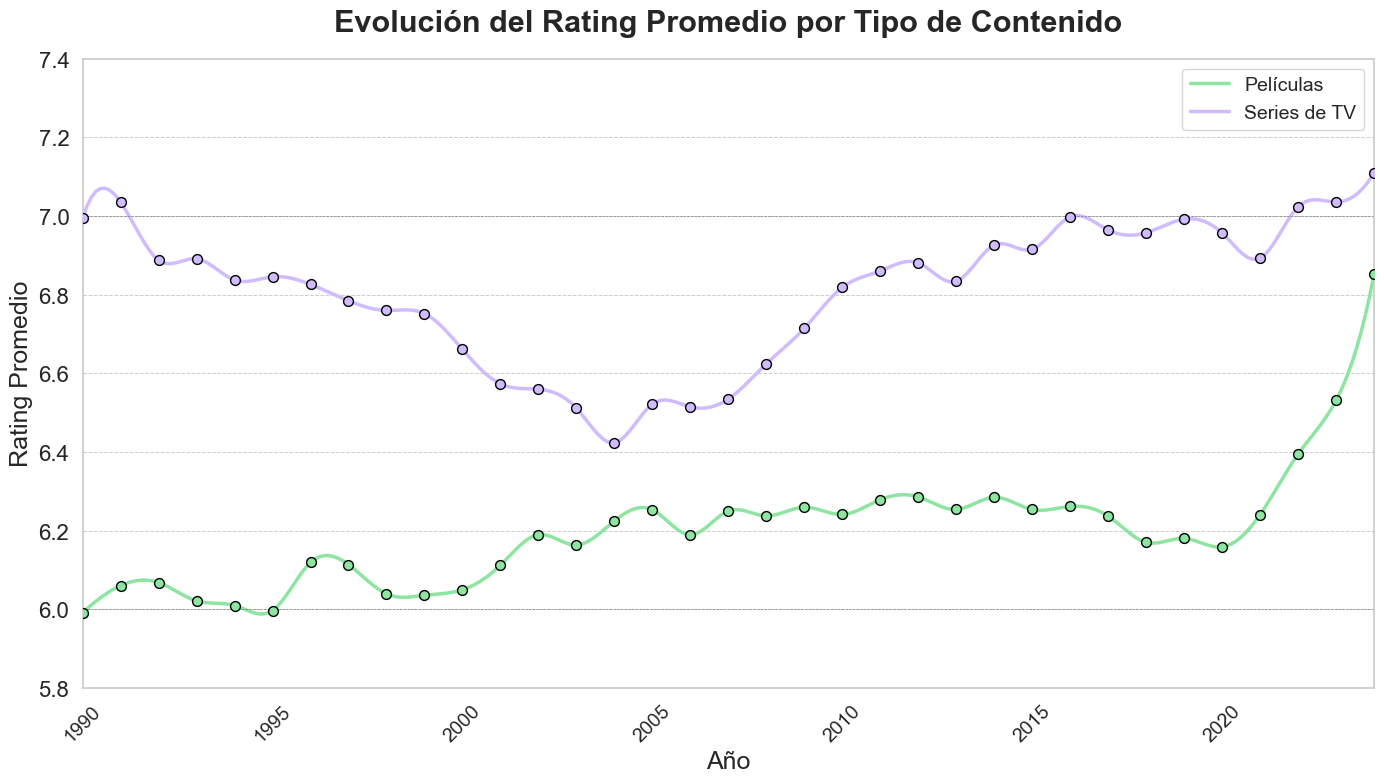

In [58]:
# Crear el gráfico lineal
fig, ax2 = plt.subplots(figsize=(14, 8))

# Colores usando una paleta de Seaborn
color_movies = sns.color_palette("pastel")[2]
color_tvseries = sns.color_palette("pastel")[4]

# Suavizar las líneas
def smooth_line(x, y, n_points=300):
    x_new = np.linspace(x.min(), x.max(), n_points)
    spline = make_interp_spline(x, y, k=3)  # Cubic spline
    y_smooth = spline(x_new)
    return x_new, y_smooth

# Suavizar líneas para películas y series de TV
x_smooth_movies, y_smooth_movies = smooth_line(df_movies['release_date'], df_movies['averageRating'])
x_smooth_tvseries, y_smooth_tvseries = smooth_line(df_tvseries['release_date'], df_tvseries['averageRating'])

# Graficar las líneas suavizadas para películas y series de TV
line_movies, = ax2.plot(x_smooth_movies, y_smooth_movies, label='Películas', color=color_movies, linewidth=2.5)
line_tvseries, = ax2.plot(x_smooth_tvseries, y_smooth_tvseries, label='Series de TV', color=color_tvseries, linewidth=2.5)

# Añadir puntos marcadores a las líneas
movies_scatter = ax2.scatter(df_movies['release_date'], df_movies['averageRating'], color=color_movies, edgecolor='black', s=50, zorder=3)
tvseries_scatter = ax2.scatter(df_tvseries['release_date'], df_tvseries['averageRating'], color=color_tvseries, edgecolor='black', s=50, zorder=3)

# Ajustar el tamaño de las etiquetas de los ejes X & Y
ax2.tick_params(axis='x', labelsize=14, rotation=45)
ax2.tick_params(axis='y', labelsize=16)

# Añadir tooltips a los puntos
mplcursors.cursor([movies_scatter, tvseries_scatter], hover=True).connect(
    "add", 
    lambda sel: sel.annotation.set_text(
        f"Tipo: {'Películas' if sel.artist == movies_scatter else 'Series de TV'}\nFecha: {sel.target[0]:.0f}\nRating: {sel.target[1]:.2f}"
    )
)

# Ajustes para añadir líneas horizontales y formato de ejes
ax2.yaxis.grid(True, linestyle='--', linewidth=0.7)
ax2.xaxis.grid(False)
ax2.set_xlim(df_movies['release_date'].min(), df_movies['release_date'].max())
ax2.set_ylim(0, 10)
ax2.set_xlabel("Año", fontsize=18)
ax2.set_ylabel("Rating Promedio", fontsize=18)
ax2.set_title("Evolución del Rating Promedio por Tipo de Contenido", fontsize=22, weight='bold', pad=20)

# Mejorar la leyenda
ax2.legend(handles=[line_movies, line_tvseries], labels=['Películas', 'Series de TV'], fontsize=14, loc='best')

# Añadir líneas de referencia
for y in np.arange(0, 11, 1):
    ax2.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)
    
# Ajustar el rango del eje y para mostrar más detalles
ax2.set_ylim(5.8, 7.4)

# Añadir anotaciones para destacar puntos clave
max_movie_rating = df_movies.loc[df_movies['averageRating'].idxmax()]
max_tv_rating = df_tvseries.loc[df_tvseries['averageRating'].idxmax()]



# Mostrar el gráfico lineal mejorado
plt.tight_layout()
plt.show()


**"La composición mayoritaria de películas puede reflejar una estrategia de construcción de catálogo que prioriza la adquisición de derechos de películas para satisfacer las demandas del mercado. Esto puede estar alineado con las preferencias generales de los consumidores y las tendencias de visualización."


Aunque las películas son predominantemente populares, la existencia de una cantidad considerable de series de televisión (casi una cuarta parte del total) sugiere que la plataforma ofrece una variedad de opciones para sus usuarios. Esto puede ayudar a atraer a una audiencia diversa con preferencias tanto para películas como para series.


El máximo rating de películas es de 6.8 vs 7.1 de las series de tv , sin embargo, predominan mejores evaluaciones de las series a lo largo del tiempo. **

## **Pregunta 2: ¿Cual es el rating promedio por género?**

In [8]:
df_merged = df_title_basics_computado.merge(df_title_ratings_computado, on='tconst')

In [9]:
df_merged.head()

,tconst,titleType,originalTitle,release_date,isAdult,genres,averageRating,numVotes
0,tt0000675,movie,Don Quijote,1908,0,Drama,4.20,20
1,tt0001338,movie,"Maiskaya noch, ili utoplennitsa",1910,0,Drama,5.20,18
2,tt0001475,movie,Amor fatal,1911,0,"Drama,Romance",7.40,23
3,tt0001964,movie,Die Verräterin,1911,0,Drama,5.90,102
4,tt0002670,movie,The Battle of Shiloh,1913,0,"Drama,War",4.20,16


In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394036 entries, 0 to 394035
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         394036 non-null  object 
 1   titleType      394036 non-null  object 
 2   originalTitle  394036 non-null  object 
 3   release_date   394036 non-null  int32  
 4   isAdult        394036 non-null  object 
 5   genres         394036 non-null  object 
 6   averageRating  394036 non-null  float64
 7   numVotes       394036 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 22.5+ MB


In [63]:
# Paso 1: Normalizar los géneros a minúsculas y eliminar espacios en blanco
df_merged['genres'] = df_merged['genres'].str.lower().str.strip()

# Paso 2: Explode los géneros para tener un género por fila
df_exploded_df_tmdb = df_merged.assign(genre=df_merged['genres'].str.split(',')).explode('genre')

# Paso 3: Eliminar espacios en blanco y caracteres especiales en cada género
df_exploded_df_tmdb['genre'] = df_exploded_df_tmdb['genre'].str.strip()

# Paso 4: Calcular la cantidad de contenidos por género después de la normalización
genre_counts_df_tmdb = df_exploded_df_tmdb['genre'].value_counts().reset_index()
genre_counts_df_tmdb.columns = ['genre', 'count']

# Paso 5: Calcular el rating promedio por género
genre_ratings = df_exploded_df_tmdb.groupby('genre')['averageRating'].mean().reset_index()

# Paso 6: Verificar y eliminar duplicados en 'genre_counts_df_tmdb'
if genre_counts_df_tmdb['genre'].duplicated().any():
    genre_counts_df_tmdb = genre_counts_df_tmdb.drop_duplicates(subset=['genre'])

# Verificar y eliminar duplicados en 'genre_ratings'
if genre_ratings['genre'].duplicated().any():
    genre_ratings = genre_ratings.drop_duplicates(subset=['genre'])

# Paso 7: Unir los resultados
genre_data = genre_counts_df_tmdb.merge(genre_ratings, on='genre')

# Revisar el resultado final
print(genre_data)

          genre   count  averageRating
0         drama  164498           6.37
1        comedy  104386           6.18
2   documentary   59845           7.25
3       romance   41484           6.24
4        action   38550           5.95
5         crime   33548           6.19
6      thriller   28422           5.73
7     adventure   25564           6.19
8        horror   24832           5.13
9        family   19594           6.51
10      mystery   15479           6.10
11    animation   14958           6.76
12      fantasy   12338           6.18
13      history   11416           6.93
14    biography   10751           6.99
15        music   10522           6.75
16   reality-tv   10285           6.41
17       sci-fi    9170           5.67
18      musical    7228           6.25
19          war    6962           6.48
20        sport    5948           6.80
21      western    5616           5.97
22        adult    5201           5.57
23    talk-show    4887           6.36
24    game-show    3796  

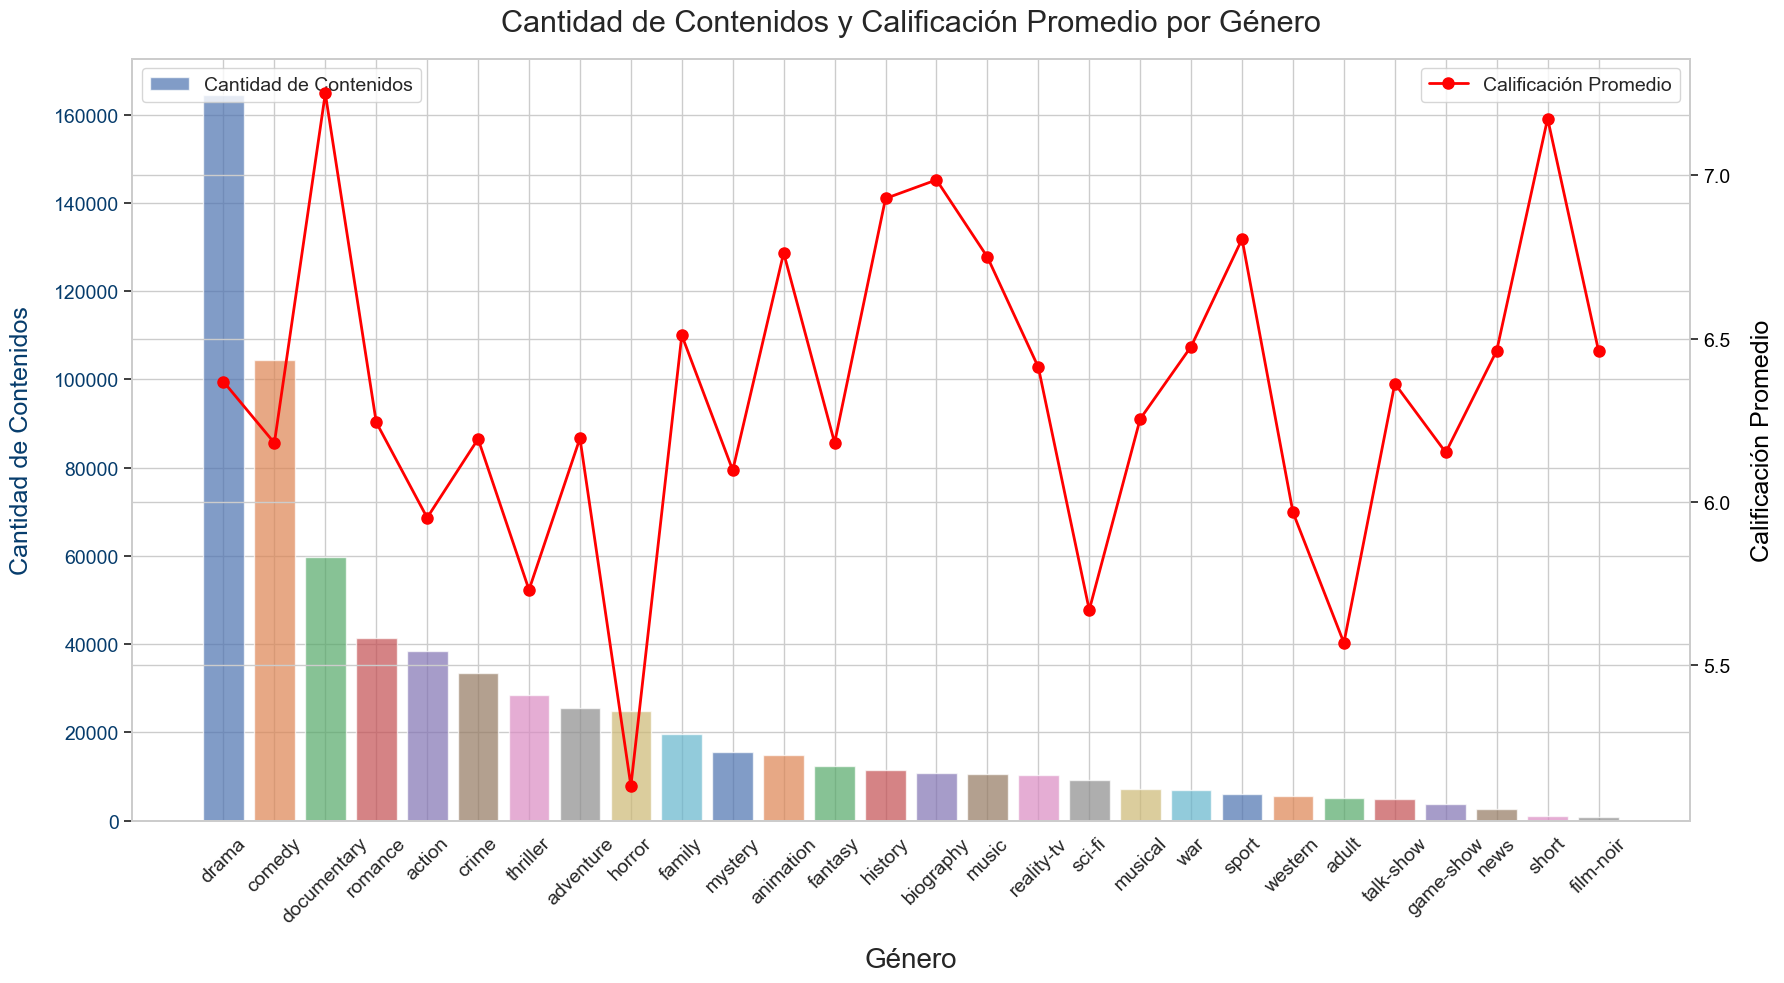

In [20]:
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico combinado
fig, ax1 = plt.subplots(figsize=(18, 10))

# Paleta de colores
palette = sns.color_palette("deep", n_colors=len(genre_data))

# Gráfico de barras para la cantidad de contenidos
bars = ax1.bar(genre_data['genre'], genre_data['count'], color=palette, alpha=0.7)
ax1.set_xlabel('Género', fontsize=20, labelpad=15)
ax1.set_ylabel('Cantidad de Contenidos', color='#063C6C', fontsize=18, labelpad=15)
ax1.tick_params(axis='y', labelcolor='#063C6C', labelsize=14)
ax1.tick_params(axis='x', labelsize=14, rotation=45)

# Crear un segundo eje para la calificación promedio
ax2 = ax1.twinx()
line = ax2.plot(genre_data['genre'], genre_data['averageRating'], color='Red', marker='o', linestyle='-', linewidth=2, markersize=8)
ax2.set_ylabel('Calificación Promedio', color='Black', fontsize=18, labelpad=15)
ax2.tick_params(axis='y', labelcolor='Black', labelsize=14)

# Título del gráfico
plt.title('Cantidad de Contenidos y Calificación Promedio por Género', fontsize=22, pad=20)

# Añadir una leyenda
ax1.legend([bars], ['Cantidad de Contenidos'], loc='upper left', fontsize=14)
ax2.legend([line[0]], ['Calificación Promedio'], loc='upper right', fontsize=14)

# Añadir interactividad con mplcursors
cursor_bars = mplcursors.cursor(bars, hover=True)
cursor_bars.connect("add", lambda sel: sel.annotation.set_text(f'{genre_data["genre"][sel.index]}\nCantidad: {genre_data["count"][sel.index]}'))

cursor_line = mplcursors.cursor(line, hover=True)
cursor_line.connect("add", lambda sel: sel.annotation.set_text(f'{genre_data["genre"][sel.index]}\nCalificación: {genre_data["averageRating"][sel.index]:.2f}'))

# Ajustar márgenes y mostrar el gráfico
plt.tight_layout()
plt.show()

**Conclusiones:** 

Los géneros más populares en términos de cantidad de contenido son Drama (164,498 contenidos) y Comedia (104,386 contenidos). Esto nos sugiere una fuerte preferencia por contenidos que ofrecen historias profundas y elementos humorísticos, lo cual podría ser clave para la retención de audiencia.

Los documentales tienen la calificación promedio más alta (7.25), indicando que los usuarios valoran mucho el contenido informativo y realista. Esto puede sugerir que hay una demanda por contenido que ofrece más que simple entretenimiento, proporcionando valor educativo o de conciencia social.

El contenido corto también tiene una calificación alta (7.17), lo que indica que hay un interés significativo en formatos más breves que pueden consumir rápidamente, posiblemente en una sola sesión, esto puede deberse a la influencia de plataformas como TikTok que incrementan esta tendencia de consumo.

**Dada la alta calificación de géneros como Documental y Biografía, podría ser beneficioso para la plataforma aumentar la inversión en contenido informativo y educativo que atrae a una audiencia crítica y exigente.**

Géneros como Biografía (6.99), Historia (6.93), y Deportes (6.80) también muestran calificaciones altas, sugiriendo que los contenidos más educativos e históricos o que se enfocan en temas específicos y nichos también son muy valorados.

Tenemos oportunidades de mejora en géneros más populares sobre todo en la calidad de los contenidos, posiblemente enfocándose en aspectos de la narrativa, producción, o temas que resuenen mejor con la audiencia.

Además, géneros como Música (6.75) y Musical (6.25) tienen buenas calificaciones, aunque su presencia sea menor en comparación con otros géneros dando una oportunidad para expandir la oferta en estos géneros y captar audiencias específicas interesadas en estos temas.


## **Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor ROI?**

In [71]:
df_tmdb_computado["ROI"].describe()

count   8760.00
mean       1.05
std        1.87
min       -1.00
25%       -0.43
50%        0.50
75%        2.00
max        7.21
Name: ROI, dtype: float64

In [69]:
# Paso 1: Normalizar los géneros a minúsculas y eliminar espacios en blanco
df_tmdb_computado['genres'] = df_tmdb_computado['genres'].str.lower().str.strip()

# Paso 2: Explode los géneros para tener un género por fila
df_exploded_df_tmdb = df_tmdb_computado.assign(genre=df_merged['genres'].str.split(',')).explode('genre')

# Paso 3: Eliminar espacios en blanco y caracteres especiales en cada género
df_exploded_df_tmdb['genre'] = df_exploded_df_tmdb['genre'].str.strip()

# Paso 4: Calcular la cantidad de contenidos por género después de la normalización
genre_counts_df_tmdb = df_exploded_df_tmdb['genre'].value_counts().reset_index()
genre_counts_df_tmdb.columns = ['genre', 'count']

# Paso 6: Verificar y eliminar duplicados en 'genre_counts_df_tmdb'
if genre_counts_df_tmdb['genre'].duplicated().any():
    genre_counts_df_tmdb = genre_counts_df_tmdb.drop_duplicates(subset=['genre'])
    
# Paso 7: Unir los resultados
#genre_data = genre_counts_df_tmdb.merge(df_tmdb_computado, on='genre')

# Revisar el resultado final
print(genre_counts_df_tmdb)

          genre  count
0         drama   3996
1        comedy   2558
2       romance   1060
3         crime    885
4        action    873
5   documentary    846
6     adventure    685
7      thriller    567
8        horror    474
9        family    401
10      mystery    359
11      western    312
12      fantasy    271
13        music    255
14      musical    247
15    animation    245
16      history    242
17          war    241
18    biography    214
19       sci-fi    206
20        adult    142
21   reality-tv    123
22        sport    111
23    talk-show     83
24    game-show     74
25    film-noir     51
26         news     41
27        short      8


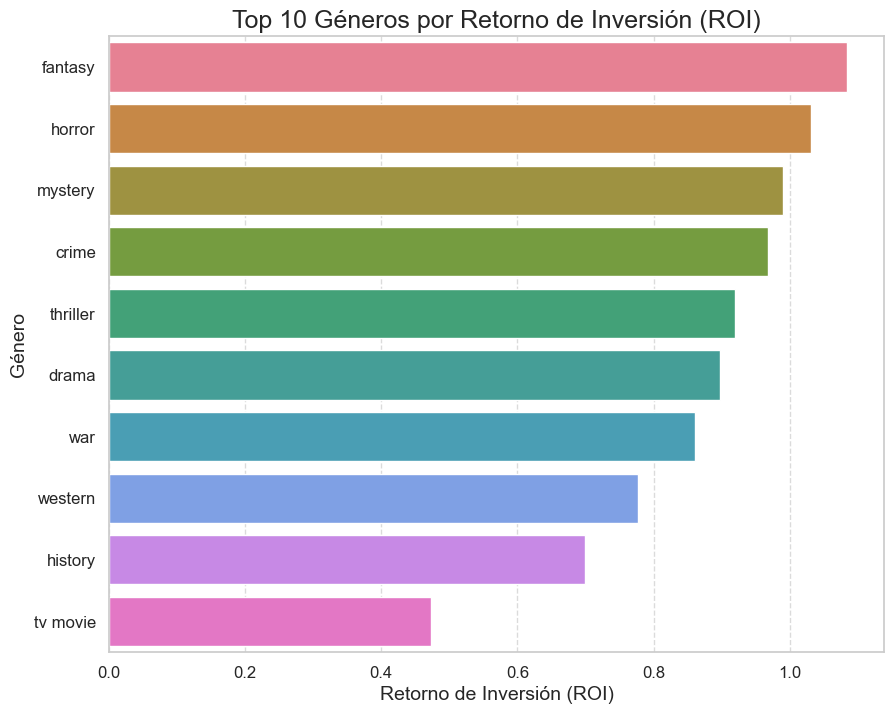

In [82]:
# Paso 1: Normalizar los géneros a minúsculas y eliminar espacios en blanco
df_tmdb_computado['genres'] = df_tmdb_computado['genres'].str.lower().str.strip()

# Paso 2: Explode los géneros para tener un género por fila
df_exploded_df_tmdb = df_tmdb_computado.assign(genre=df_tmdb_computado['genres'].str.split(',')).explode('genre')

# Paso 3: Eliminar espacios en blanco y caracteres especiales en cada género
df_exploded_df_tmdb['genre'] = df_exploded_df_tmdb['genre'].str.strip()

# Paso 4: Calcular la cantidad de contenidos por género después de la normalización
genre_counts_df_tmdb = df_exploded_df_tmdb['genre'].value_counts().reset_index()
genre_counts_df_tmdb.columns = ['genre', 'count']

# Paso 6: Verificar y eliminar duplicados en 'genre_counts_df_tmdb'
if genre_counts_df_tmdb['genre'].duplicated().any():
    genre_counts_df_tmdb = genre_counts_df_tmdb.drop_duplicates(subset=['genre'])

# Paso 7: Calcular el ROI promedio por género
genre_roi = df_exploded_df_tmdb.groupby('genre')['ROI'].mean().reset_index()

# Ordenar por ROI de manera ascendente
genre_roi = genre_roi.sort_values(by='ROI', ascending=False)

# Seleccionar los top 10 géneros por ROI
top_genres_roi = genre_roi.tail(10)

# Crear el gráfico de barras horizontales con paleta de colores "husl"
plt.figure(figsize=(10, 8))
sns.barplot(x='ROI', y='genre', data=top_genres_roi, palette='husl')  # Utiliza la paleta 'husl'
plt.xlabel('Retorno de Inversión (ROI)', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.title('Top 10 Géneros por Retorno de Inversión (ROI)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


## **Pregunta 4: ¿Cuáles son los países con mayor producción de contenido?**

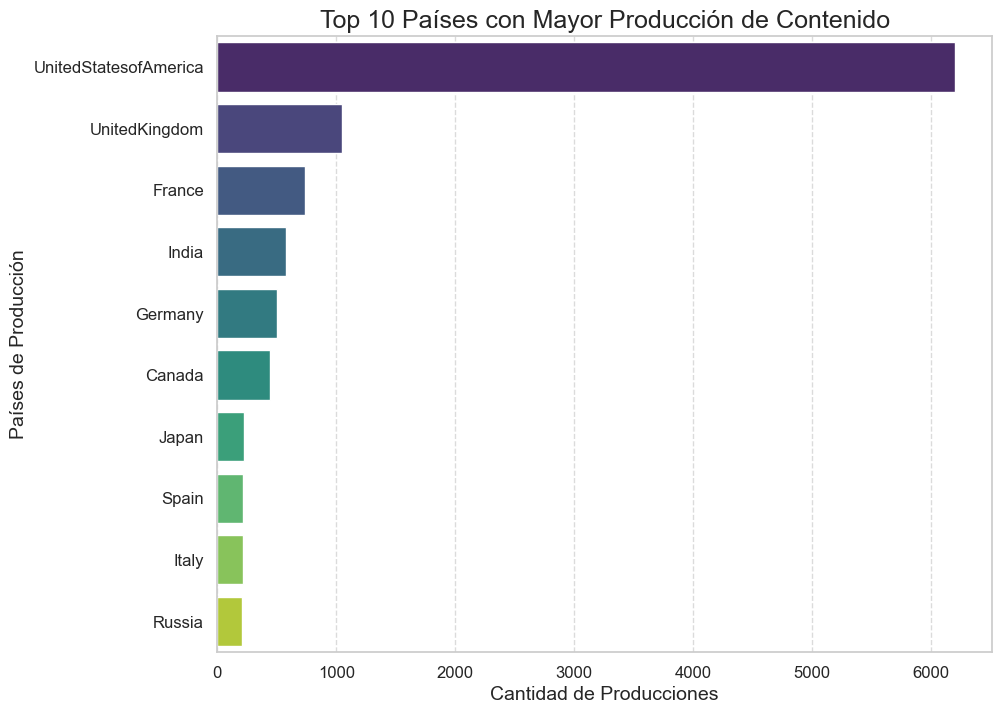

In [83]:
# Paso 1: Normalizar los países de producción y explotarlos si es necesario
df_tmdb_computado['production_countries'] = df_tmdb_computado['production_countries'].str.replace(' ', '').str.split(',')
df_countries = df_tmdb_computado.explode('production_countries')

# Paso 2: Conteo de producciones por país
top_countries = df_countries['production_countries'].value_counts().head(10)

# Paso 3: Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Cantidad de Producciones', fontsize=14)
plt.ylabel('Países de Producción', fontsize=14)
plt.title('Top 10 Países con Mayor Producción de Contenido', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


**Estados Unidos, Reino unido y Francia, son quienes más desarrollan contenido**

## **Pregunta 5: ¿Cuál es el top 15 compañias con mayor retorno de inversión?**

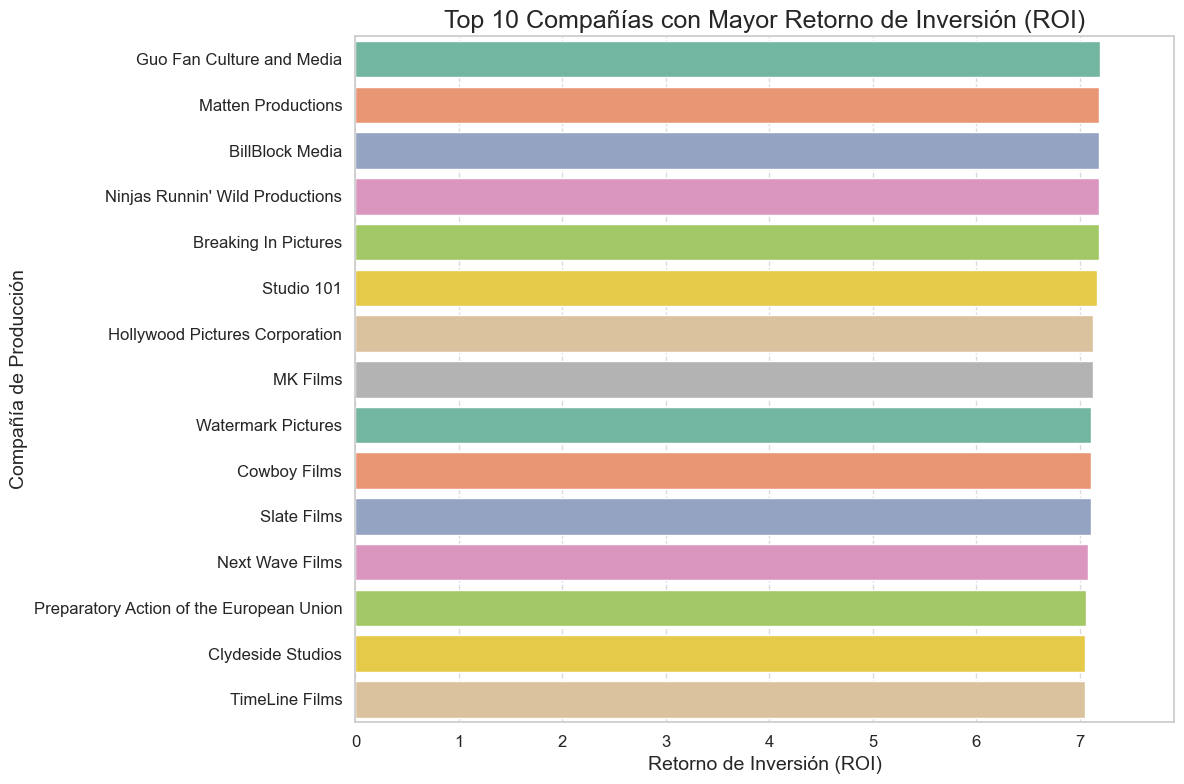

In [99]:
# Paso 1: Explode de la columna 'production_companies'
df_companies = df_tmdb_computado.assign(company=df_tmdb_computado['production_companies'].str.split(',')).explode('company')

# Paso 2: Limpiar y normalizar las compañías
df_companies['company'] = df_companies['company'].str.strip()

# Paso 3: Calcular el ROI promedio por compañía de producción
company_roi = df_companies.groupby('company')['ROI'].mean().reset_index()

# Paso 4: Seleccionar y ordenar las top 10 compañías por ROI
top_companies_roi = company_roi.sort_values(by='ROI', ascending=False).head(15)

# Paso 5: Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='ROI', y='company', data=top_companies_roi, palette='Set2')

# Obtener el valor máximo de ROI en el top 10
max_roi = top_companies_roi['ROI'].max()

# Ajustar el rango del eje y para mostrar el top 10 completo
plt.xlim(0, max_roi * 1.1)  # Incrementar un 10% más allá del valor máximo

# Añadir etiquetas y título
plt.xlabel('Retorno de Inversión (ROI)', fontsize=14)
plt.ylabel('Compañía de Producción', fontsize=14)
plt.title('Top 10 Compañías con Mayor Retorno de Inversión (ROI)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**El top completo muestra que estas compañias suelen hacer proyectos que representan hasta el 7% de ROI en los proyectos que realizan**